<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout5_SimpleLinearRegression_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #5 : Simple Linear Regression - Part A : Analysis of Variance Output


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 5.1

Consider data on the home prices of homes in Winona.  This data was collected using Redfin website. 
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: CurrentPrice ($) </li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>SquareFeet, the size of the home (ft^2)</li>
          <li>Bedroom, number of bedrooms in home</li>
          <li>Bathrooms, number of bathrooms in home</li>
          <li>Garage, number of vehicle stalls in garage</li>
          <li>YearBuilt, the year in which the home was built</li>
          <li>LotSize, the size of the lot (ft^2)</li>
          <li>Taxes, the amount of taxes on home ($)</li>
          <li>DaysOnMarket, the number of days this home has been on the market</li>
          <li>OriginalPrice, the original listing price of the home</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1Nl6Jmi0W15ghB9JrJxj40F-230hEwXKm" width='50%' height='50%'></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)

Redfin Data: <a href="https://www.redfin.com/city/18151/MN/Winona">Webpage</a></li>

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [2]:
#@title Reading in Data

# Reading data in using read.csv via Base 
WinonaHomePrices <- read_csv("http://www.StatsClass.org/stat360/Datasets/HomePrices.csv")

Rows: 207 Columns: 11

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): MLS, CurrentPrice, SquareFeet, Bedrooms, Bathrooms, Garage, YearBu...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



The **head()** function can be used to see the first few lines of the dataset.

In [3]:
#@title View the first few rows of data
head(WinonaHomePrices)

MLS,CurrentPrice,SquareFeet,Bedrooms,Bathrooms,Garage,YearBuilt,LotSize,Taxes,DaysonMarket,OriginalPrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4036305,119900,1936,3,2,2,1920,7000,1448,151,129900
4034062,73700,1696,2,1,1,1916,6860,664,245,73700
4038971,104500,1196,3,2,2,1890,7000,1216,51,104500
4034561,114900,864,2,1,2,1940,5000,1092,218,114900
4035526,215000,3300,4,3,2,2001,NA,2850,174,215000
4035472,169500,2069,4,2,2,1886,6000,1584,174,179500


## Simple Linear Regression - Model Setup

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: CurrentPrice</li>
  <li><strong>Independent / Predictor Variable</strong>: SquareFeet</li>
  <li><i>Assume</i> the following structure for the <strong>mean</strong> and <strong>variance</strong> functions</li>
  </ul>

<ul><ul>
  <li>$E(CurrentPrice | SquareFeet) = \beta_{0} + \beta_{1} * SquareFeet$</li>
  <li>$Var(CurrentPrice | SquareFeet) = \sigma^{2}$</li>
</ul></ul>

<u>Comments</u>

The mean function specified above is called a <strong>simple linear regression model</strong>: 

*   <strong>Simple</strong> implies a single predictor variable, i.e. SquareFeet
*   <strong>Linear</strong> implies the function is linear in its parameters, not in which the predictor variable are used in the model.  For example, the following mean function is a linear regression model because this model is linear in its parameters, but is not a straight line.
<br>
[Math Stuff]: A linear mean function implies the partial derivative with respect to any parameter is free of all other parameters.
*    The above variance function is simply a constant, generically labeled as $\sigma^2$.


## Simple Linear Regression - Scatterplot

Typically, the first step in doing a simple linear regression analysis is to create a scatterplot of the two variables.  The response variables goes on the y-axis and the independent / predictor variable goes on the x-axis.

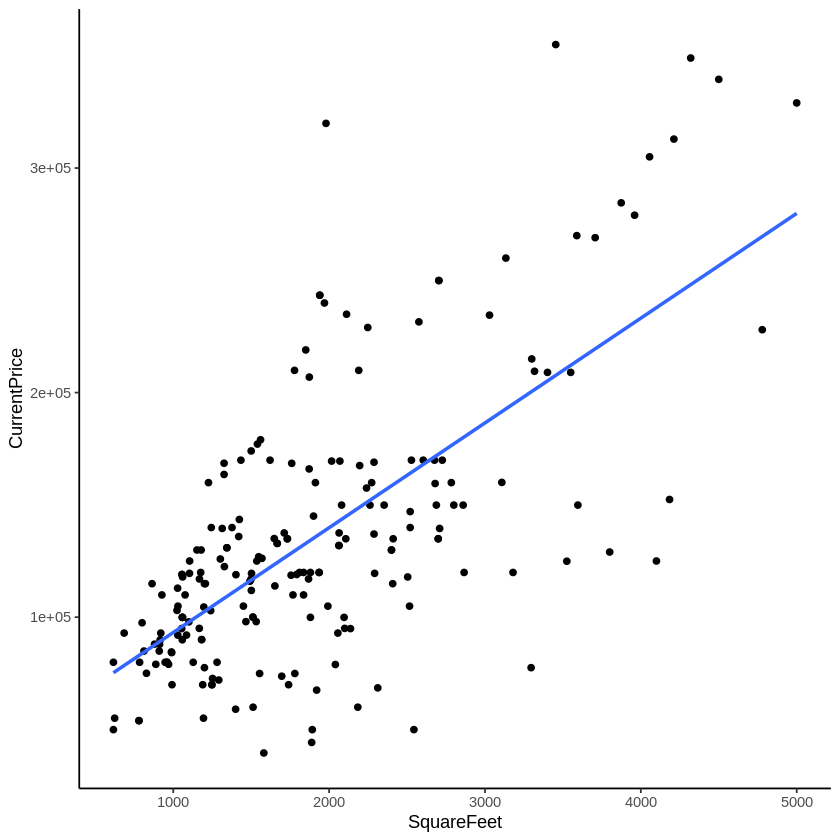

In [ ]:
#@title Scatterplot with simple linear regression line
ggplot(data=WinonaHomePrices, aes(x=SquareFeet,y=CurrentPrice)) + 
  geom_point() +    #adding the points to the plot
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +  #adding a regression line to the plot without the standard error bands 
  theme_classic()

## Simple Linear Regression - Fitting the Model

In [ ]:
#@title Fitting the simple linear regression model
WinonaHomePrices_Model <- lm(CurrentPrice ~ SquareFeet, data=WinonaHomePrices)

The output from model fit is saved into an R object.

In [ ]:
#@title The model object
WinonaHomePrices_Model


Call:
lm(formula = CurrentPrice ~ SquareFeet, data = WinonaHomePrices)

Coefficients:
(Intercept)   SquareFeet  
   46509.35        46.66  


There are many elements attached to this object.  The names() function will identify the various elements.

In [ ]:
names(WinonaHomePrices_Model)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

For example, to obtain the call that was used to build the simple linear regression model, $call can be added to the end of the object name.

In [ ]:
WinonaHomePrices_Model$call

lm(formula = CurrentPrice ~ SquareFeet, data = WinonaHomePrices)

In [ ]:
anova(WinonaHomePrices_Model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
SquareFeet,1,361215923587,361215923587,173.4965,4.129567e-29
Residuals,205,426805545074,2081978269,NA,NA


Fitting a restricted model, i.e. with just a y-intercept.

In [ ]:
anova(lm(CurrentPrice ~ rep(1,207), data=WinonaHomePrices))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Residuals,206,788021468661,3825346935,NA,NA


Getting the output for the coefficients.

In [ ]:
summary(WinonaHomePrices_Model)


Call:
lm(formula = CurrentPrice ~ SquareFeet, data = WinonaHomePrices)

Residuals:
    Min      1Q  Median      3Q     Max 
-122809  -24601   -1478   21576  180999 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46509.351   7421.878   6.267 2.14e-09 ***
SquareFeet     46.662      3.543  13.172  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45630 on 205 degrees of freedom
Multiple R-squared:  0.4584,	Adjusted R-squared:  0.4557 
F-statistic: 173.5 on 1 and 205 DF,  p-value: < 2.2e-16


End of Document